In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from normalization import min_max
from grader import grader

In [2]:
dataframe = pd.read_csv('characters.csv')

In [3]:
dataframe.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49,brown,light,brown,19BBY,female,Alderaan,Human


name 	- we will reject this one
height 
mass 
hair_color
skin_color
eye_color
birth_year - we will also reject this one
gender 	
homeworld 	
species

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     object 
 3   hair_color  81 non-null     object 
 4   skin_color  85 non-null     object 
 5   eye_color   84 non-null     object 
 6   birth_year  43 non-null     object 
 7   gender      84 non-null     object 
 8   homeworld   77 non-null     object 
 9   species     82 non-null     object 
dtypes: float64(1), object(9)
memory usage: 6.9+ KB


In [5]:
print(dataframe.describe())

           height
count   81.000000
mean   174.358025
std     34.770429
min     66.000000
25%    167.000000
50%    180.000000
75%    191.000000
max    264.000000


In [6]:
from map_generator import generate_map
label_searched = 'species'
labels_known = ['height','mass' ,'hair_color' ,'skin_color',	'eye_color' ,'birth_year' ,	'gender' ,	'homeworld' ]

y=dataframe[[label_searched]]
x = dataframe[labels_known ]

data_map = {}
for label in labels_known:
    data_map[label]=  generate_map(x[label])

for data in data_map:
    x.loc[:, data] = x[data].replace(data_map[data])

x_normalised= min_max(x.values.tolist(),labels_known );
x_norm=pd.DataFrame(x_normalised)
x_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   height      87 non-null     float64
 1   mass        87 non-null     float64
 2   hair_color  87 non-null     float64
 3   skin_color  87 non-null     float64
 4   eye_color   87 non-null     float64
 5   birth_year  87 non-null     float64
 6   gender      87 non-null     float64
 7   species     87 non-null     float64
dtypes: float64(8)
memory usage: 5.6 KB


/tmp/ipykernel_14229/3596449078.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.loc[:, data] = x[data].replace(data_map[data])


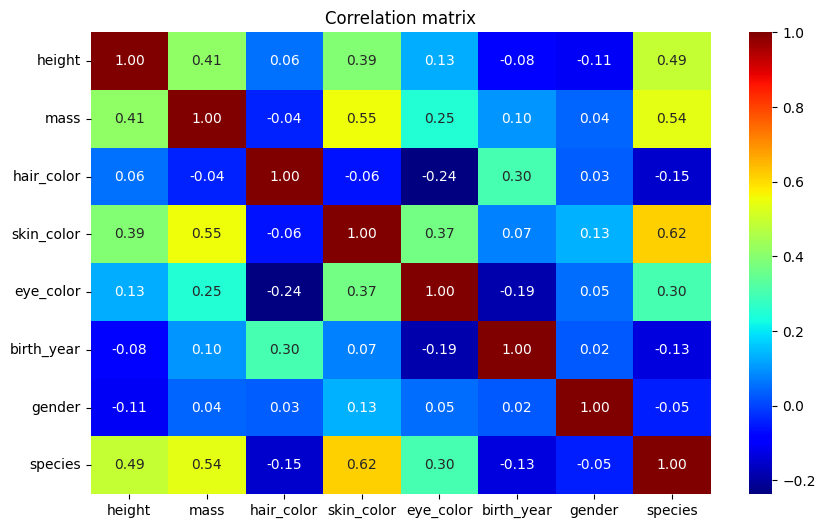

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(x_norm.corr(), annot=True,cmap='jet',fmt='.2f') #jet,copper, coolwarm
plt.title('Correlation matrix')
plt.show()

In [8]:
solution_map=generate_map(y[label_searched])
y_mapped=y.replace(solution_map)
y[label_searched].value_counts()

/tmp/ipykernel_14229/220513663.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_mapped=y.replace(solution_map)


homeworld
Naboo             11
Tatooine          10
Alderaan           3
Kamino             3
Coruscant          3
Mirial             2
Kashyyyk           2
Corellia           2
Ryloth             2
Iridonia           1
Iktotch            1
Quermia            1
Dorin              1
Champala           1
Geonosis           1
Zolan              1
Serenno            1
Concord Dawn       1
Cerea              1
Ojom               1
Aleen Minor        1
Skako              1
Muunilinst         1
Shili              1
Kalee              1
Umbara             1
Glee Anselm        1
Vulpter            1
Haruun Kal         1
Tund               1
Stewjon            1
Eriadu             1
Rodia              1
Nal Hutta          1
Bestine IV         1
Trandosha          1
Socorro            1
Bespin             1
Mon Cala           1
Chandrila          1
Endor              1
Sullust            1
Cato Neimoidia     1
Toydaria           1
Malastare          1
Dathomir           1
Troiken            1
Uta

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_mapped, test_size=0.2, random_state = 10)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from bestNeighborsNumber import findBestNeighboursNumber
max_number_of_neighbours = 30
max_index, solutions = findBestNeighboursNumber(x_train, x_test, y_train, y_test, max_number_of_neighbours)

1/30
2/30
3/30
4/30
5/30
6/30
7/30
8/30
9/30
10/30
11/30
12/30
13/30
14/30
15/30
16/30
17/30
18/30
19/30
20/30
21/30
22/30
23/30
24/30
25/30
26/30
27/30
28/30
29/30


Best solution is for k = 24 and achieved score of 22.22222222222222 %


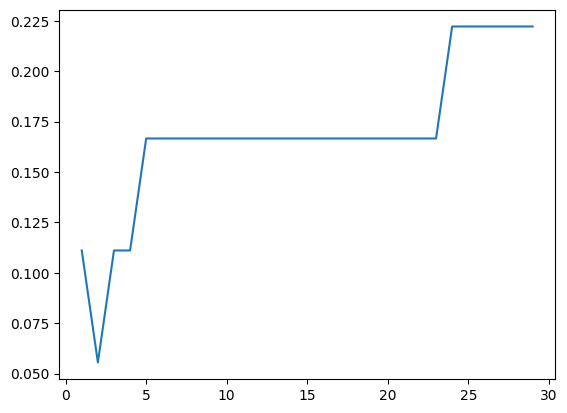

In [11]:
plt.plot(range(1,max_number_of_neighbours),solutions)
print(f"Best solution is for k = {max_index+1} and achieved score of {solutions[max_index]*100} %")

In [12]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train.values.ravel())
y_pred=nb_classifier.predict(x_test)
print(f"Naive Bayes algotithm have achieved score of {nb_classifier.score(x_test,y_test)*100}%")

Naive Bayes algotithm have achieved score of 22.22222222222222%
